In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd   # 파이썬에서 쓸 수 있는 excel
import numpy as np
import re
from plotnine import *
pre_sale = pd.read_csv('data/전국_평균_분양가격(2018.7월).csv', encoding='euc-kr')

In [7]:
pre_sale.shape      # (행, 열)
pre_sale.head()     # 위에서 5개 데이터 가져옴
pre_sale.tail()     # 뒤에서 5개 데이터 가져옴
pre_sale.info()     # 요약
pre_sale.dtypes     # 데이터형태 확인
pre_sale.isnull().sum()     # 결축치 확인

(2890, 5)
  지역명               규모구분    연도   월 분양가격(㎡)
0  서울                 전체  2015  10    5841
1  서울         전용면적 60㎡이하  2015  10    5652
2  서울   전용면적 60㎡초과 85㎡이하  2015  10    5882
3  서울  전용면적 85㎡초과 102㎡이하  2015  10    5721
4  서울        전용면적 102㎡초과  2015  10    5879
     지역명               규모구분    연도  월 분양가격(㎡)
2885  제주                 전체  2018  7    3334
2886  제주         전용면적 60㎡이하  2018  7     NaN
2887  제주   전용면적 60㎡초과 85㎡이하  2018  7    3356
2888  제주  전용면적 85㎡초과 102㎡이하  2018  7    3226
2889  제주        전용면적 102㎡초과  2018  7    2990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB
None
지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object
지역명          0
규모구분         0
연도     

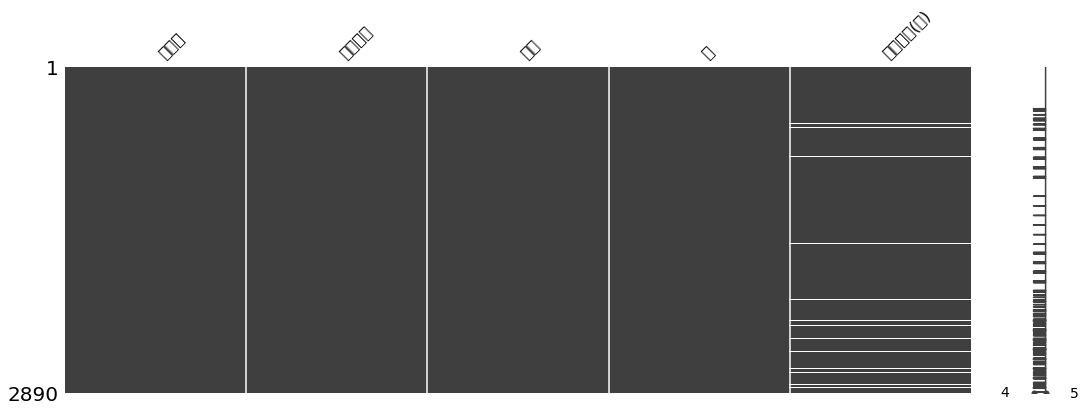

In [11]:
# 결축치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18, 6))

In [12]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경 
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [14]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [15]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해봅시다.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [16]:
pre_sale.info()     # 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [17]:
pre_sale.dtypes     # 데이터형태 확인

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [18]:
pre_sale.isnull().sum()     # 결축치 확인

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [19]:
pre_sale.describe()  # float데이터 요약(단위: 천원)

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [22]:
pre_sale.describe?

In [23]:
pre_sale.describe(include=[np.object])  # object타입의 데이터요약 (top은 랜덤값)

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,경기,전용면적 85㎡초과 102㎡이하,2016,11,2221
freq,170,578,1020,255,17


In [24]:
# 2017년 데이터만 봅니다. (연도 데이터타입='str')
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape  # (행, 열)

(1020, 7)

In [27]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    578
전용면적 60㎡이하           578
전용면적 60㎡초과 85㎡이하     578
전체                   578
전용면적 102㎡초과          578
Name: 규모구분, dtype: int64

In [28]:
pre_sale['지역명'].value_counts()

경기    170
경북    170
강원    170
제주    170
충남    170
광주    170
대구    170
부산    170
충북    170
전남    170
전북    170
대전    170
세종    170
인천    170
서울    170
울산    170
경남    170
Name: 지역명, dtype: int64